# Student Recommender System

## Preprocessing

In [5]:
import pandas as pd
import numpy as np

raw_df = pd.read_excel('../data/giallozaferano_dataset.xlsx')

#Print all the features (columns) of the DataFrame
raw_df.columns

Index(['url', 'title', 'cost', 'category', 'imageURL', 'description',
       'prepTime', 'cookTime', 'totalTime', 'yield', 'isVegetarian',
       'isLactoseFree', 'isGlutenFree', 'isLight', 'isLowNickel', 'calories',
       'carbohydrates', 'sugars', 'proteins', 'fat', 'saturatedFat', 'fibers',
       'cholesterol', 'sodium', 'ingredients_measure', 'ingredients',
       'instructions', 'bestRating', 'ratingCount', 'ratingValue',
       'difficulty'],
      dtype='object')

In [6]:
raw_df.head()

,url,title,cost,category,imageURL,description,prepTime,cookTime,totalTime,yield,...,fibers,cholesterol,sodium,ingredients_measure,ingredients,instructions,bestRating,ratingCount,ratingValue,difficulty
0,https://ricette.giallozafferano.it/Pancakes-al...,Pancakes with dacere syrup,Molto basso,Dolci,https://www.giallozafferano.it/images/ricette/...,"Making pancakes at home is very simple, you ne...",PT15M,PT20M,PT35M,4,...,0.9,117.0,63.0,"[Butter 25g, Flour 00 125g, Medium Eggs 2, Fre...","[Butter, Flour 00, Eggs, Whole Milk, Baking Po...",Iniziamo la preparazione dei pancake fondendo ...,5.0,736.0,4.4,Molto facile
1,https://ricette.giallozafferano.it/Tiramisu.html,Tiramisu,Medio,Dolci,https://www.giallozafferano.it/images/ricette/...,Tiramisu is definitely one of the most delicio...,PT40M,PTM,PT40M,8,...,1.4,259.0,151.0,"[Savoiardi 300g, Fresh eggs (about 4 medium) 2...","[Savoiardi, Eggs, Mascarpone, Sugar, Coffee, C...",Per preparare il tiramisÃ¹ cominciate dalle uo...,5.0,1055.0,4.2,Facile
2,https://ricette.giallozafferano.it/Crepes-dolc...,Sweet and salty crepes (basic recipe),Basso,Dolci,https://www.giallozafferano.it/images/ricette/...,Thanks to the basic dough of sweet and salty c...,PT10M,PT15M,PT25M,8,...,0.8,83.0,56.0,"[Medium eggs 3, Flour 00 250g, Whole milk 500m...","[Eggs, Flour 00, Whole Milk, Butter]",Per preparare le crepe dolci e salate iniziate...,5.0,381.0,4.2,Facile
3,https://ricette.giallozafferano.it/Spaghetti-a...,Spaghetti carbonara,Basso,Primi piatti,https://www.giallozafferano.it/images/ricette/...,The recipe for spaghetti carbonara is typical ...,PT15M,PT10M,PT25M,4,...,2.2,383.0,586.0,"[Spaghetti 320 g, Cheek 150g, Medium Egg Yolks...","[Spaghetti, Guanciale, Yolks, Roman Pecorino, ...",Per preparare gli spaghetti alla carbonara com...,5.0,854.0,4.2,Facile
4,https://ricette.giallozafferano.it/Impasto-per...,Pasta for pizza,Molto basso,Lievitati,https://www.giallozafferano.it/images/ricette/...,The dough for pizza is a basic preparation mad...,PT20M,PTM,PT20M,2,...,6.3,NaN,1966.0,"[Farina Manitoba 200g, Flour 00 300g, Water at...","[Farina Manitoba, Flour 00, Water, ""Extra Virg...",Per preparare la pasta per la pizza abbiamo sc...,5.0,367.0,4.2,Facile


### Cleanup

#### Selecting only the relevant features

In [4]:
relevant_features = ['cost', 'category', 'totalTime', 'difficulty', 'bestRating', 'ratingCount', 'ratingValue']
df = raw_df[relevant_features]

df.head()

,cost,category,totalTime,difficulty,bestRating,ratingCount,ratingValue
0,Molto basso,Dolci,PT35M,Molto facile,5.0,736.0,4.4
1,Medio,Dolci,PT40M,Facile,5.0,1055.0,4.2
2,Basso,Dolci,PT25M,Facile,5.0,381.0,4.2
3,Basso,Primi piatti,PT25M,Facile,5.0,854.0,4.2
4,Molto basso,Lievitati,PT20M,Facile,5.0,367.0,4.2


#### Printing out all the possible values for the following features

In [5]:
print("cost features:", df.cost.unique(), '\n')
print("category features:", df.category.unique(), '\n')
print("difficulty features:", df.difficulty.unique(), '\n')

cost features: ['Molto basso' 'Medio' 'Basso' nan 'Elevato' 'Molto elevata'] 

category features: ['Dolci' 'Primi piatti' 'Lievitati' 'Salse e Sughi' 'Piatti Unici'
 'Contorni' 'Antipasti' 'Secondi piatti' 'Torte salate' 'Bevande'
 'Insalate' 'Marmellate e Conserve' 'DolciSpecial'] 

difficulty features: ['Molto facile' 'Facile' 'Media' 'Difficile' 'Molto difficile' nan] 



#### Identifying features with nullvalues and removing rows

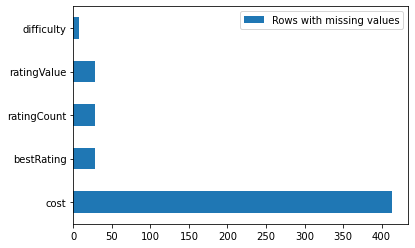

In [6]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum())      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Rows with missing values' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [7]:
# Dropping nullvalues for columns
df = df[df['difficulty'].notnull()]
df = df[df['ratingValue'].notnull()]
df = df[df['ratingCount'].notnull()]
df = df[df['bestRating'].notnull()]
df = df[df['cost'].notnull()]

plot_nas(df)

No NAs found


### Converting features

In [8]:
# Dictionaries with translations to english
costDict = {
    'molto basso': 'very low', 
    'basso': 'low', 
    'medio': 'medium', 
    'elevato': 'high', 
    'molto elevata': 'very high'
    }

difficultyDict = {
    'molto facile': 'very easy',
    'facile': 'easy',
    'media': 'medium',
    'difficile': 'difficult',
    'molto difficile': 'very difficult'
}

categoryDict = {
    'dolci': 'desserts',
    'primi piatti': 'first courses',
    'lievitati': 'leavened',
    'salse e sughi': 'sausages and sauces',
    'piatti unici': 'unique dishes',
    'contorni': 'side dishes',
    'antipasti': 'appetizers',
    'secondi piatti': 'second dishes',
    'torte salate': 'savory pies',
    'bevande': 'drinks',
    'insalate': 'salads',
    'marmellate e conserve': 'jams and preserves',
    'dolcispecial': 'special sweets'
}

translationDict = {
    'molto basso': 1, 
    'basso': 2, 
    'medio': 3, 
    'elevato': 4, 
    'molto elevata': 5,

    'molto facile': 1,
    'facile': 2,
    'media': 3,
    'difficile': 4,
    'molto difficile': 5,

    'dolci': 'desserts',
    'primi piatti': 'first courses',
    'lievitati': 'leavened',
    'salse e sughi': 'sausages and sauces',
    'piatti unici': 'unique dishes',
    'contorni': 'side dishes',
    'antipasti': 'appetizers',
    'secondi piatti': 'second dishes',
    'torte salate': 'savory pies',
    'bevande': 'drinks',
    'insalate': 'salads',
    'marmellate e conserve': 'jams and preserves',
    'dolcispecial': 'special sweets',
}

#### Conversion functions

In [9]:
import re

def convertTimeToMinutes(time: str):
    x = re.search("\d+", time)
    
    if not x:
        return 0
    return int(x.group())

def convertCategoric(x: str):
    italian = x.lower()
    result = translationDict[italian]
    return result

#### Applying language conversion to categoric features, as well as converting time to numeric

In [12]:
df['totalMinutes'] = df['totalTime'].apply(convertTimeToMinutes)
df['category'] = df['category'].apply(convertCategoric)
df['cost'] = df['cost'].apply(convertCategoric)
df['difficulty'] = df['difficulty'].apply(convertCategoric)

In [13]:
#Drop the totalTime column, we don't need it as we created new column after conversion
df = df.drop('totalTime', axis=1)

#Display the dataframe
df.head()

,cost,category,difficulty,bestRating,ratingCount,ratingValue,totalMinutes
0,1,desserts,1,5.0,736.0,4.4,35
1,3,desserts,2,5.0,1055.0,4.2,40
2,2,desserts,2,5.0,381.0,4.2,25
3,2,first courses,2,5.0,854.0,4.2,25
4,1,leavened,2,5.0,367.0,4.2,20


### You can ask for input in Python. This way, you can directly ask your users what they are looking for. This could allow them to search more 'directly'

In [12]:
# def build_chart(gen_df, percentile=0.8):
#     #Ask for preferred genres
#     print("Input preferred genre")
#     genre = input()
    
#     #Ask for lower limit of duration
#     print("Input shortest duration")
#     low_time = int(input())
    
#     #Ask for upper limit of duration
#     print("Input longest duration")
#     high_time = int(input())
    
#     #Ask for lower limit of timeline
#     print("Input earliest year")
#     low_year = int(input())
    
#     #Ask for upper limit of timeline
#     print("Input latest year")
#     high_year = int(input())
    
#     #Define a new movies variable to store the preferred movies. Copy the contents of gen_df to movies
#     movies = gen_df.copy()
    
#     #Filter based on the condition
#     movies = movies[(movies['genre'] == genre) & 
#                     (movies['runtime'] >= low_time) & 
#                     (movies['runtime'] <= high_time) & 
#                     (movies['year'] >= low_year) & 
#                     (movies['year'] <= high_year)]
    
#     #Compute the values of C and m for the filtered movies
#     C = movies['vote_average'].mean()
#     m = movies['vote_count'].quantile(percentile)
    
#     #Only consider movies that have higher than m votes. Save this in a new dataframe q_movies
#     q_movies = movies.copy().loc[movies['vote_count'] >= m]
    
#     #Calculate score using the IMDB formula
#     q_movies['score'] = q_movies.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) 
#                                        + (m/(m+x['vote_count']) * C)
#                                        ,axis=1)

#     #Sort movies in descending order of their scores
#     q_movies = q_movies.sort_values('score', ascending=False)
    
#     return q_movies

In [16]:
def build_chart(gen_df, percentile=0.8):
    maxPrice = int(input("Max price? "))
    maxMinutes = int(input("Max minutes? "))
    maxDifficulty = int(input("Max difficulty? "))
    
    
    recipes = gen_df.copy()
    
    recipes = recipes[(recipes['cost'] <= maxPrice) &
                     (recipes['totalMinutes'] <= maxMinutes) &
                     (recipes['difficulty'] <= maxDifficulty)]
    
    C = recipes["cost"].mean()
    m = recipes['ratingValue'].quantile(percentile)
    
    q_recipes = recipes.copy().loc[recipes["ratingValue"] <= m]
    
    q_recipes.head()
    
    q_recipes.sort_values('ratingValue', ascending=False)
    
    return q_recipes

#### This going to be the interactive part of the script. Now, we are going to generate a user dialog, in which the user needs to put in values that are also part of the database. So, you can't just type random works, because then the script will break down. The genre should match any of the possibilities in the dataset (e.g., comedy), the other inputs are integers. Try it!

In [17]:
#Generate the chart for top animation movies and display top 5.
build_chart(df).head()

,cost,category,difficulty,bestRating,ratingCount,ratingValue,totalMinutes
0,1,desserts,1,5.0,736.0,4.4,35
1,3,desserts,2,5.0,1055.0,4.2,40
2,2,desserts,2,5.0,381.0,4.2,25
3,2,first courses,2,5.0,854.0,4.2,25
4,1,leavened,2,5.0,367.0,4.2,20


In [18]:
#Convert the cleaned (non-exploded) dataframe df into a CSV file and save it in the data folder
#Set parameter index to False as the index of the DataFrame has no inherent meaning.
df.to_csv('../data/metadata_clean.csv', index=False)